In [12]:
import matplotlib.pyplot as plt
import torch
import matplotlib.cm as cm

def plot_reconstructions(model, dataset, epoch, num_samples=5):
    """
    Plot original and reconstructed waveforms.
    """
    plt.figure(figsize=(15, 6))
    
    # Sample data points from the dataset
    sampled_data = [dataset[i][0] for i in range(num_samples)]
    sampled_data = torch.stack(sampled_data)
    
    # Get the reconstructed data points
    with torch.no_grad():
        reconstructed_data, _, _ = model(sampled_data)
    
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.plot(sampled_data[i].numpy(), label="Original")
        plt.plot(reconstructed_data[i].numpy(), label="Reconstructed")
        plt.title(f"Reconstruction {i+1}")
        plt.legend()
        
    plt.tight_layout()
    plt.savefig(f'figures/reconstructions_{epoch}_3.png')

# Adapted plot_latent_traversal function to include "true" generative factors
def plot_latent_traversal(model, epoch, num_samples=50):
    """
    Plot waveforms generated by varying each dimension in the latent space.
    Also plots waveforms generated using the "true" generative factors for comparison.
    """
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    viridis = cm.get_cmap('viridis', num_samples)
    for i in range(model.encoder.out_features):
        z = torch.zeros(num_samples, model.encoder.out_features)
        z[:, i] = torch.linspace(-2, 2, num_samples)
        
        # Generate waveforms by varying the i-th latent dimension
        with torch.no_grad():
            generated_data = model.decoder(z)
        
        for j in range(num_samples):
            ax[i].plot(generated_data[j].numpy(), label=f"Latent Dim {j+1}", color=viridis(j / num_samples))
        plt.colorbar(cm.ScalarMappable(cmap=viridis), label='Traversal Value', ax=ax[i])
        plt.title(f"Latent Dim {i+1}", fontsize=16)
        
    plt.tight_layout()
    plt.savefig(f'figures/latent_{epoch}_3.png')


In [6]:
import sys
sys.path.append('../../../')

import os
dirs = os.listdir('saved_models/')
from models.unsupervised.vae.model import Encoder, Decoder, VAE
import pickle as pkl

In [7]:
dirs

['L0.1_C0_lr0.002_lam_sstep_lr_sexp',
 'disentangled_2',
 'disentangled_5',
 'disentangled_3',
 'disentanglement_4',
 'Final',
 'disentangled',
 'L0.1_C0_lr0.001_lam_sstep_lr_snone']

/var/folders/b_/x8lg97sd7512c9qf07myy77m0000gn/T/ipykernel_23653/2296657265.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', num_samples)


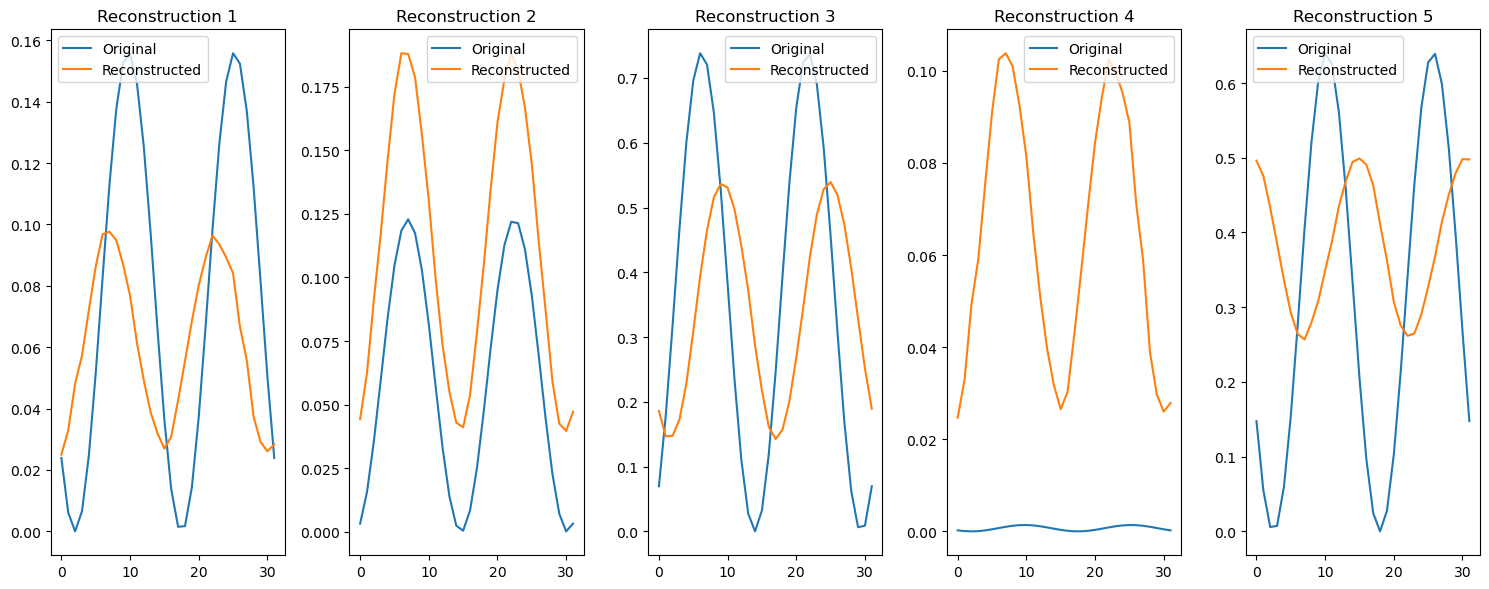

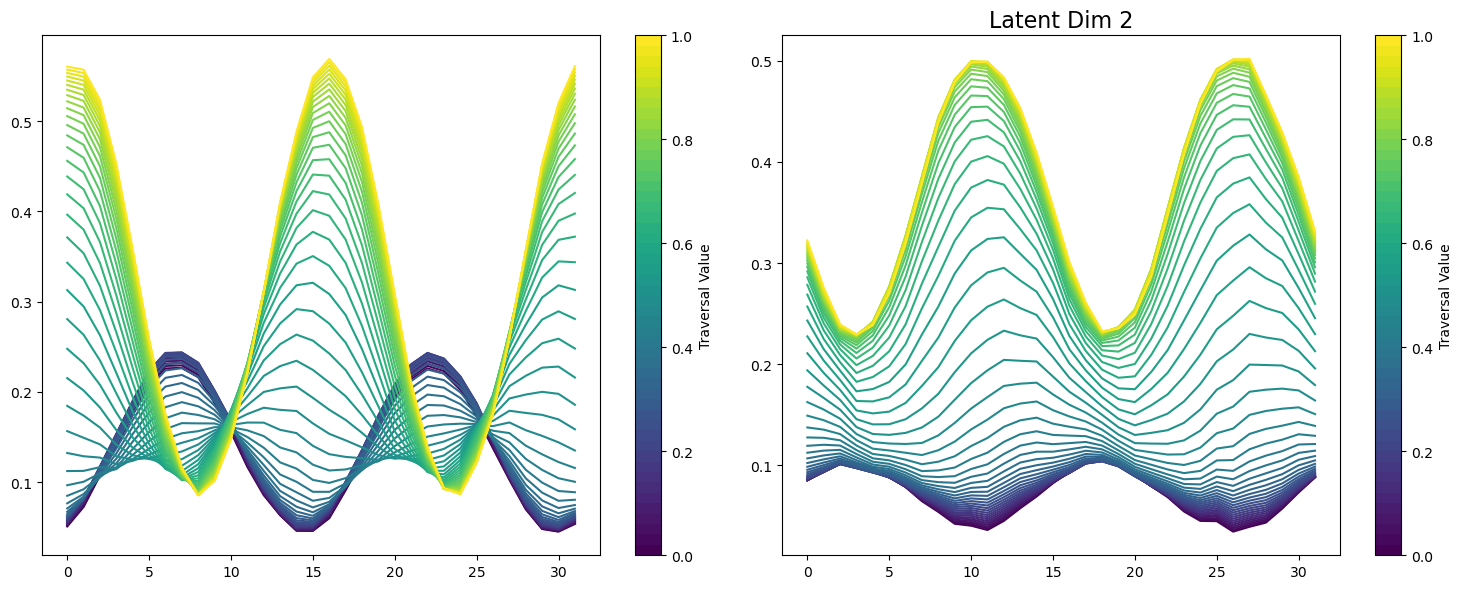

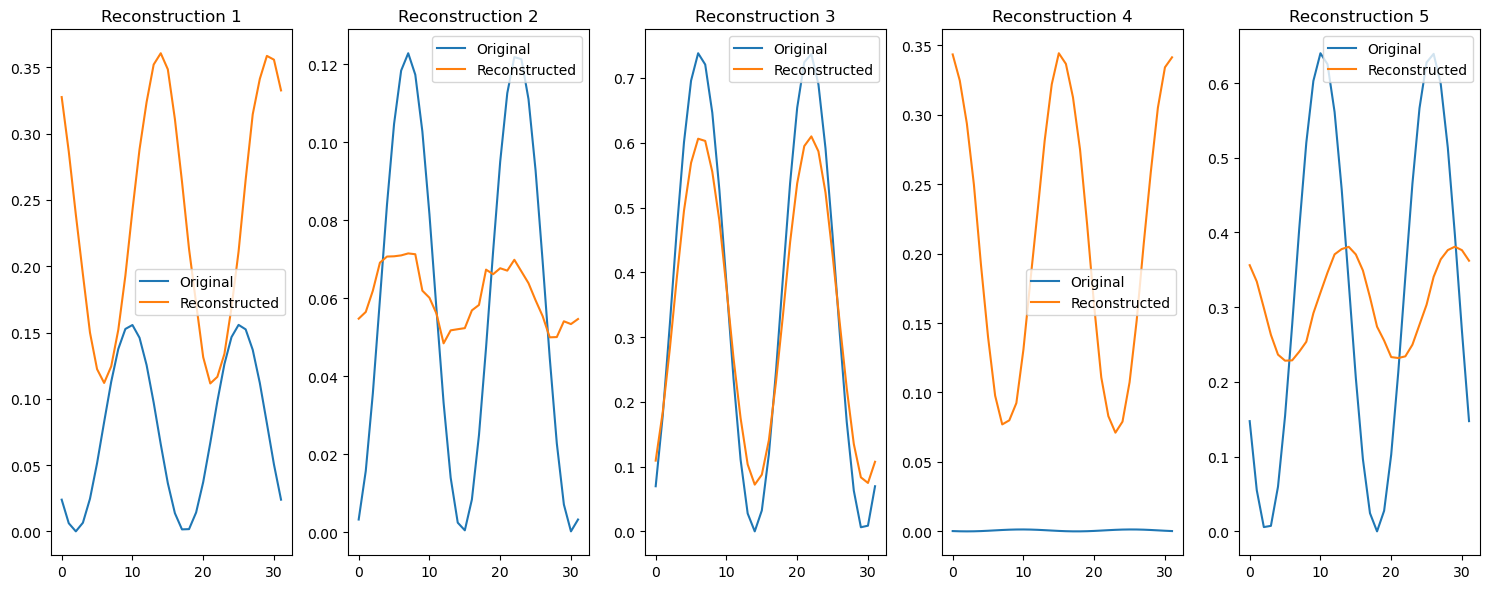

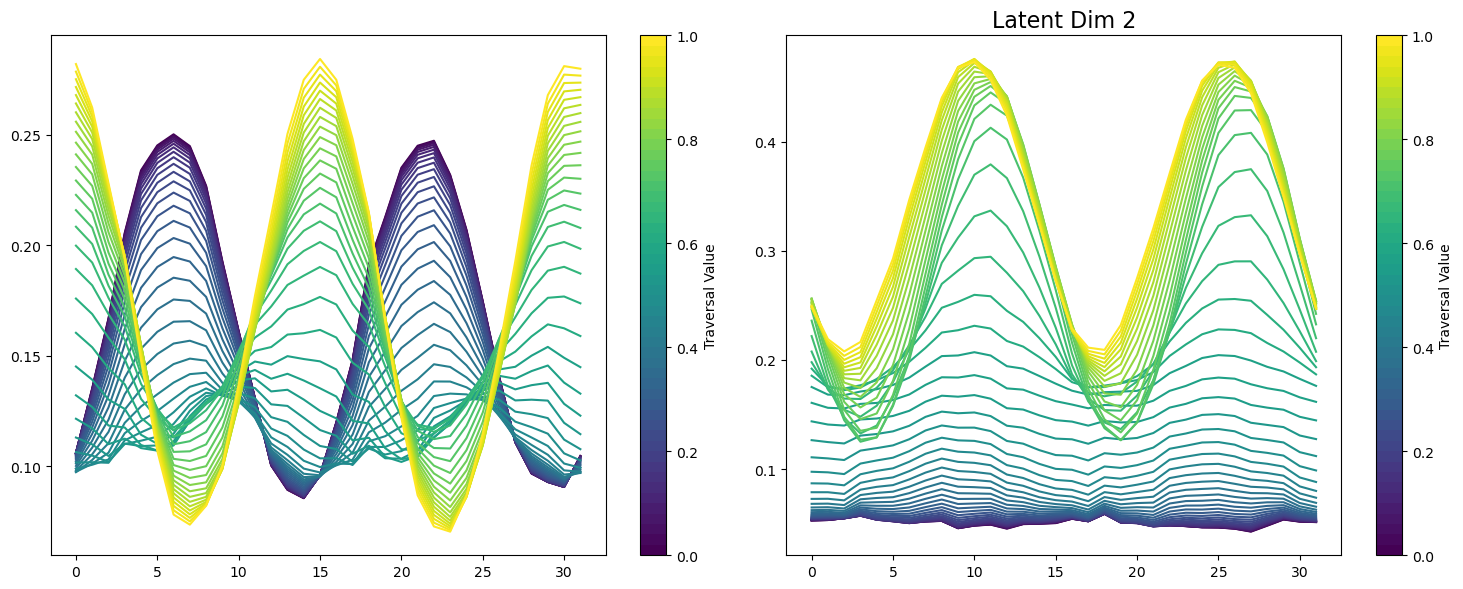

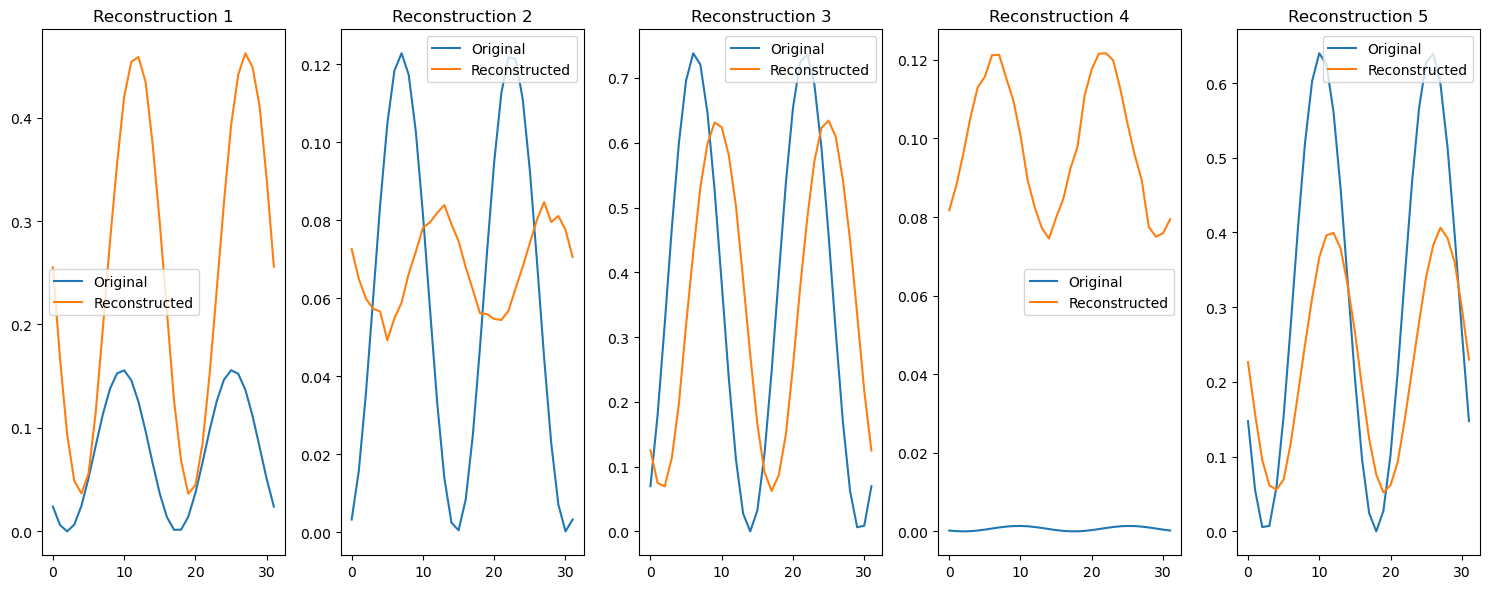

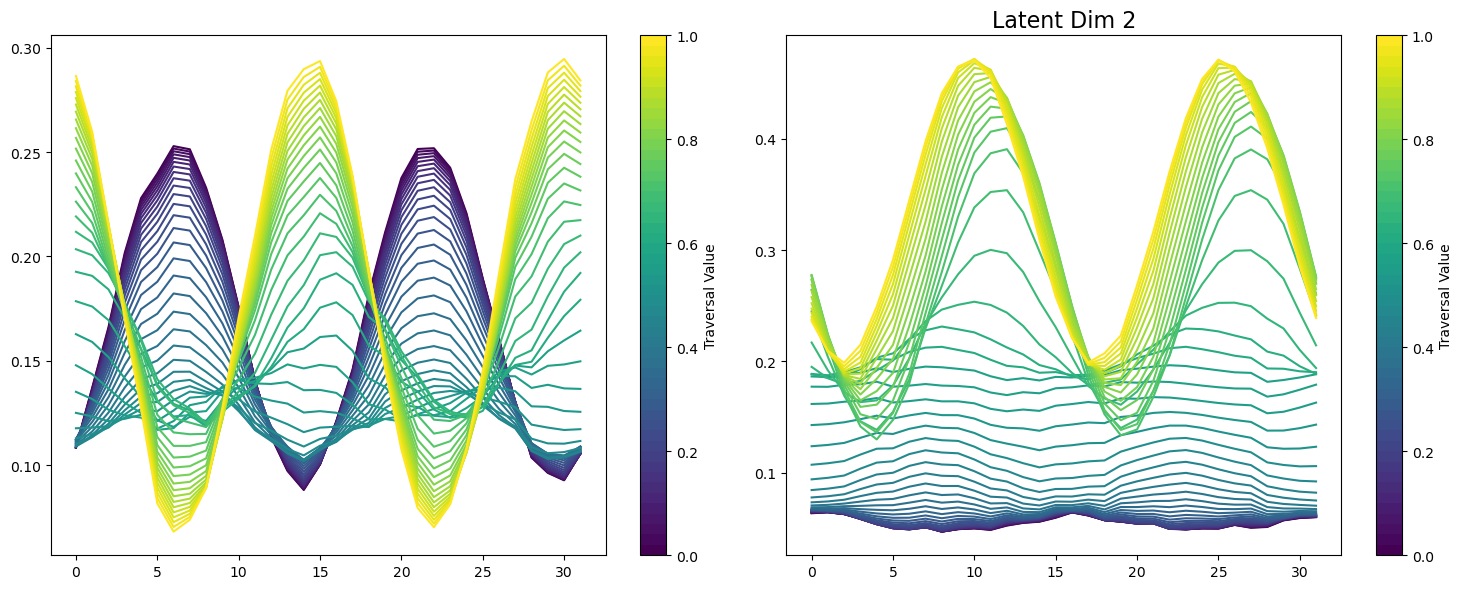

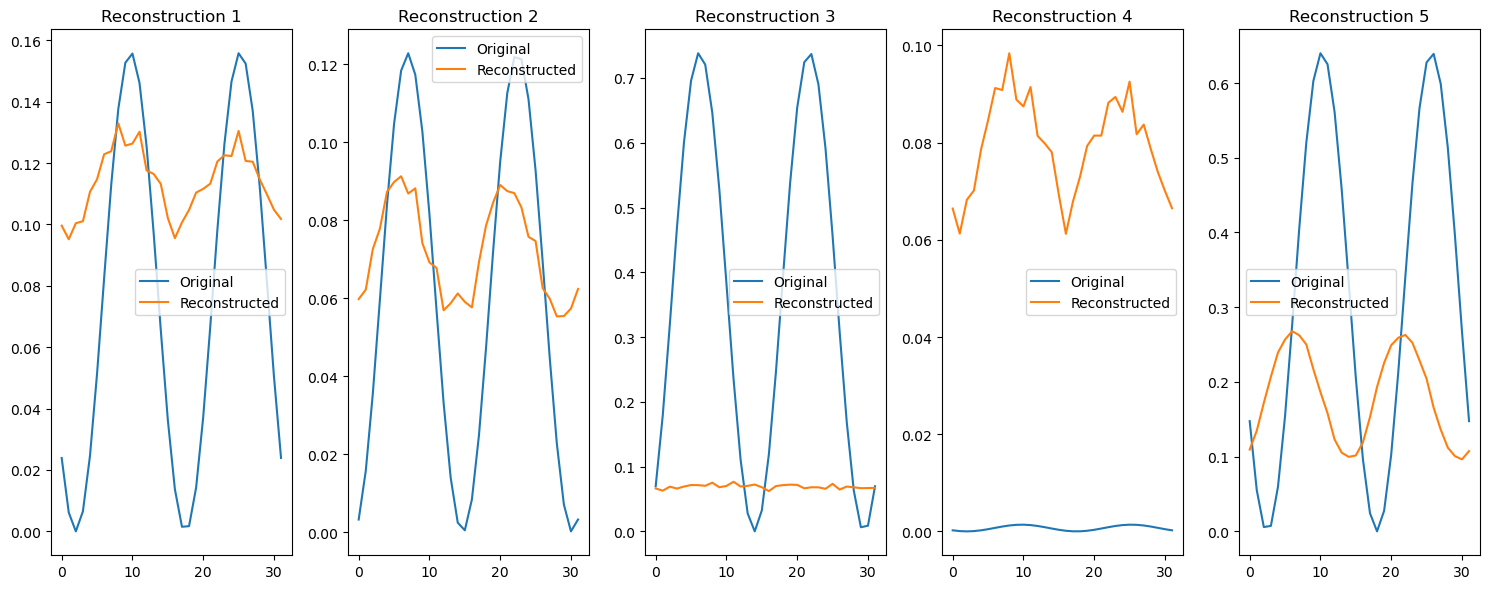

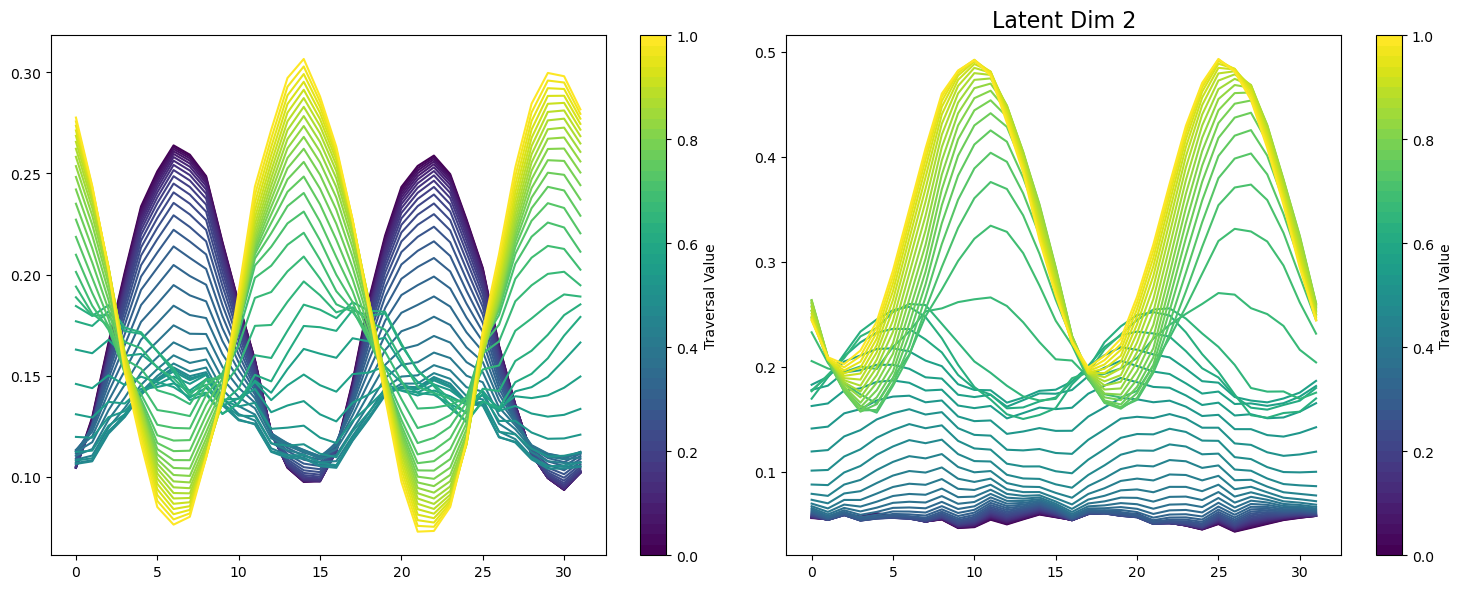

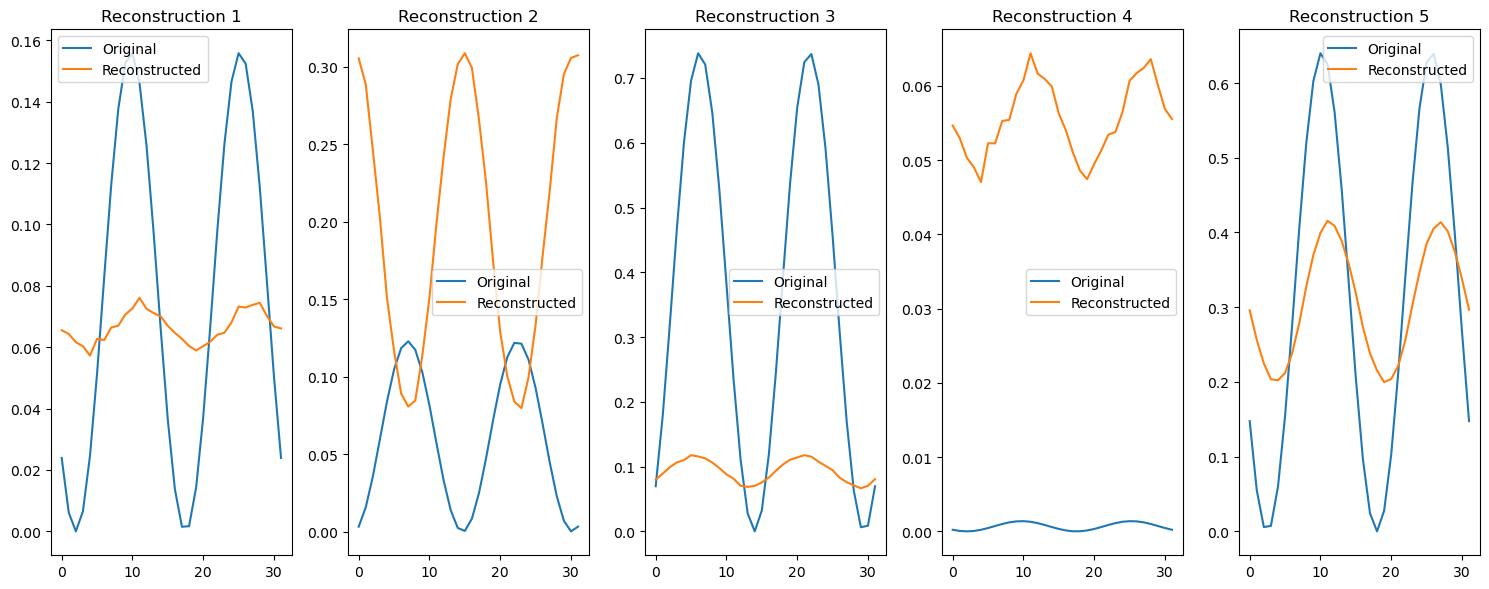

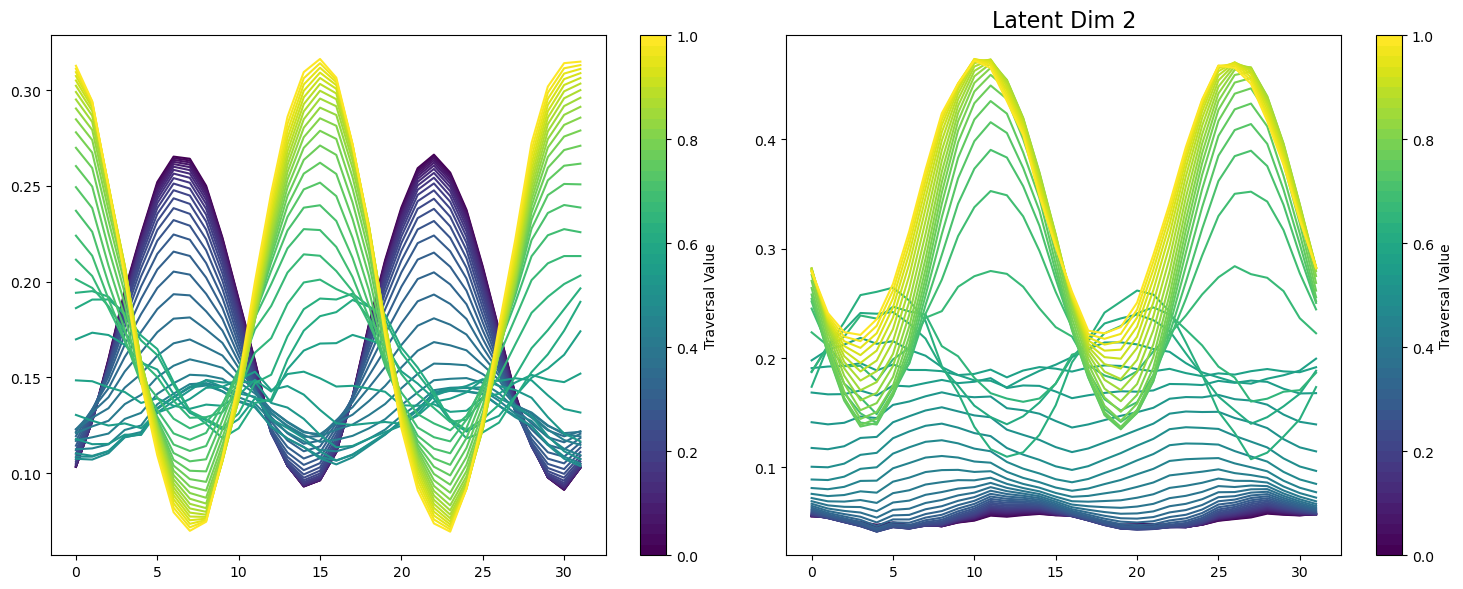

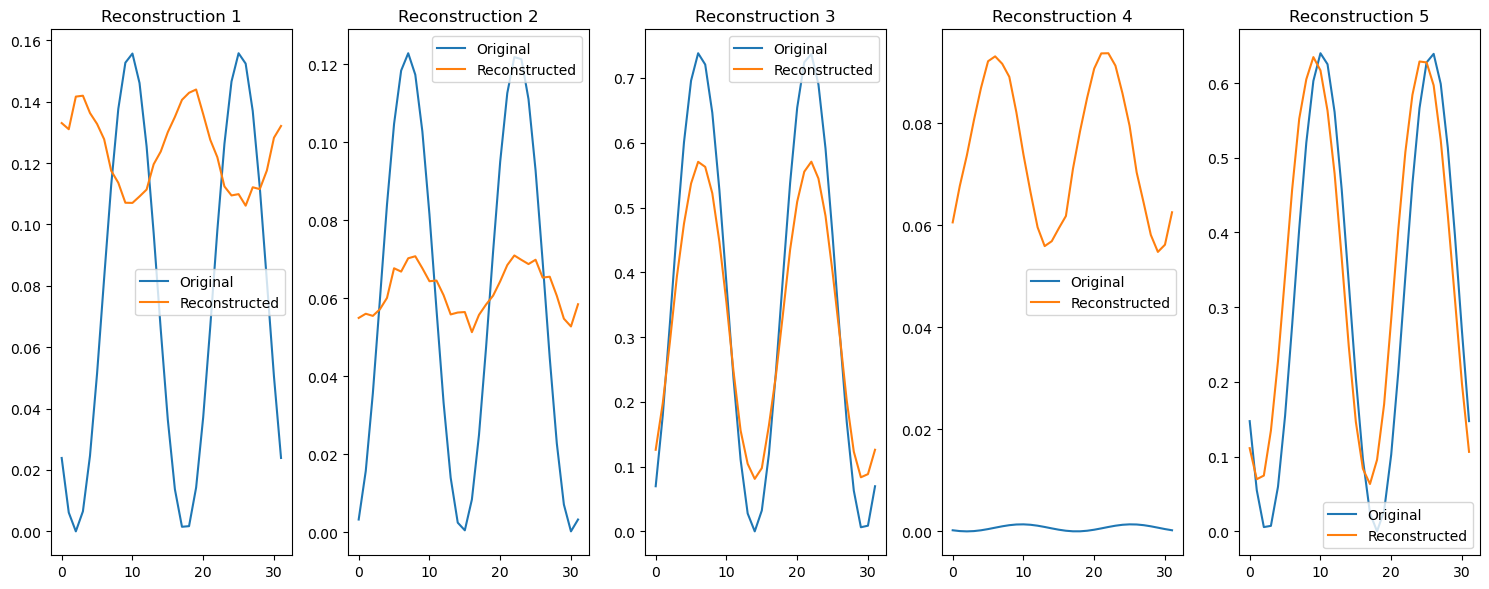

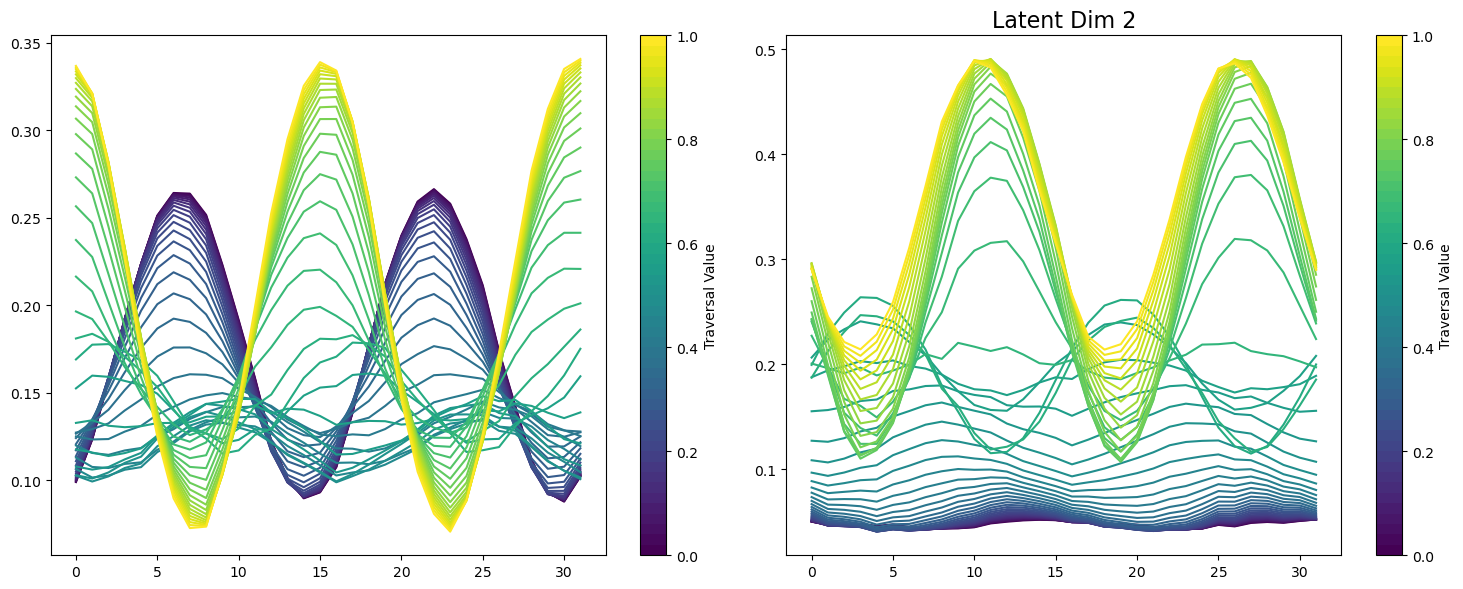

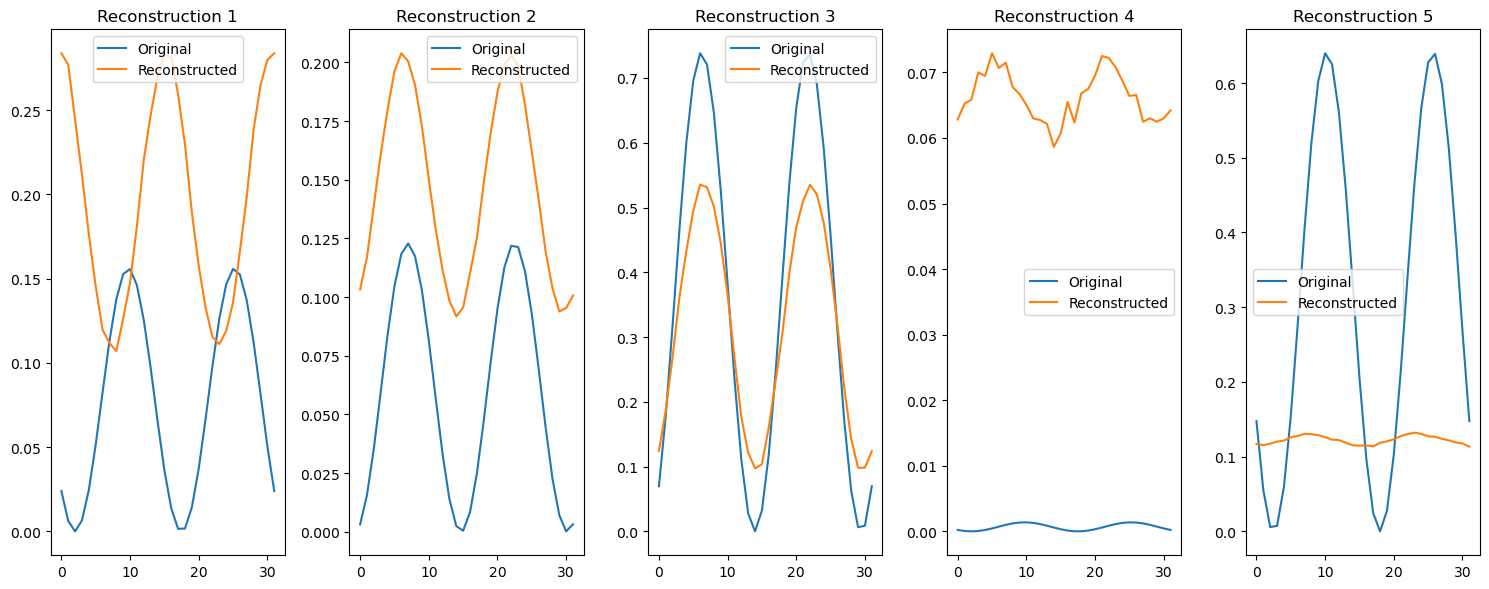

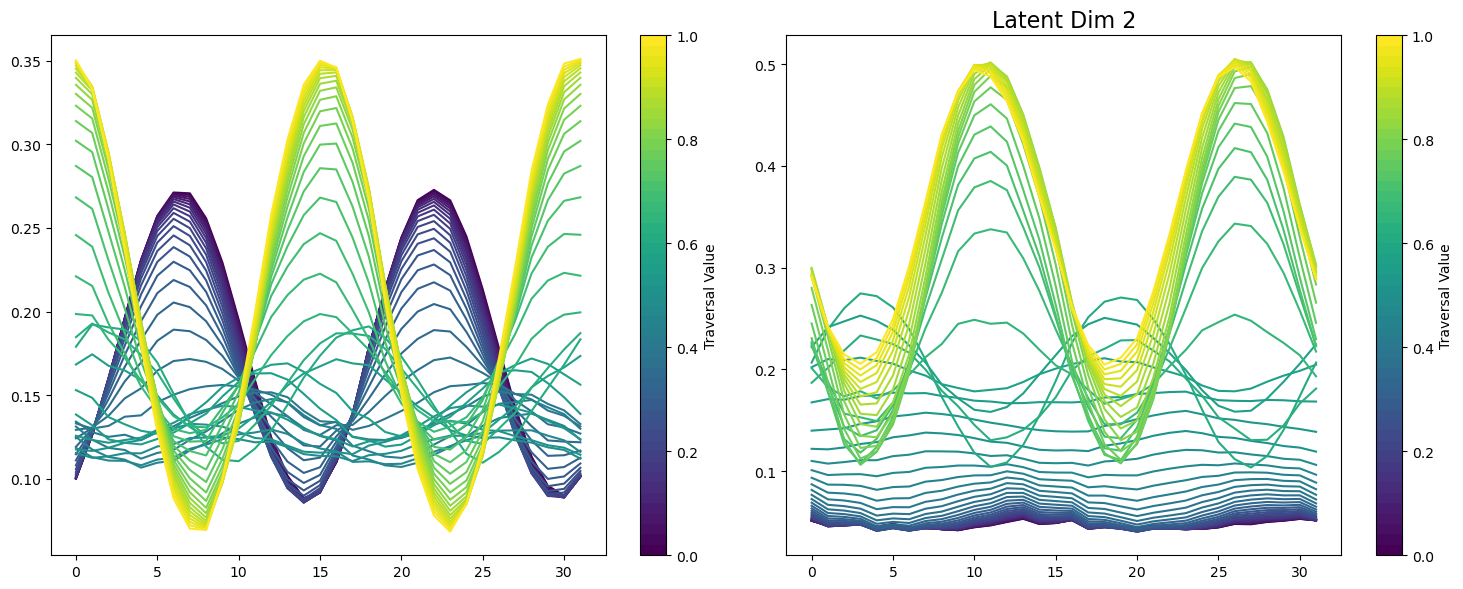

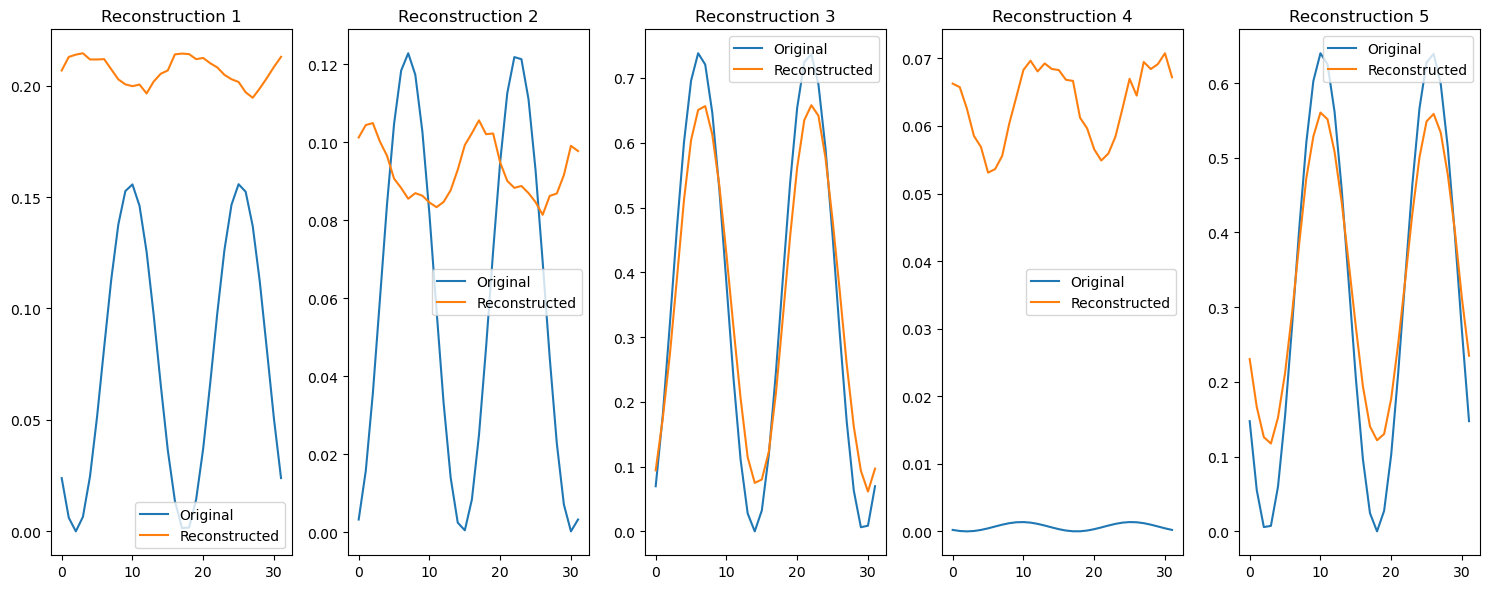

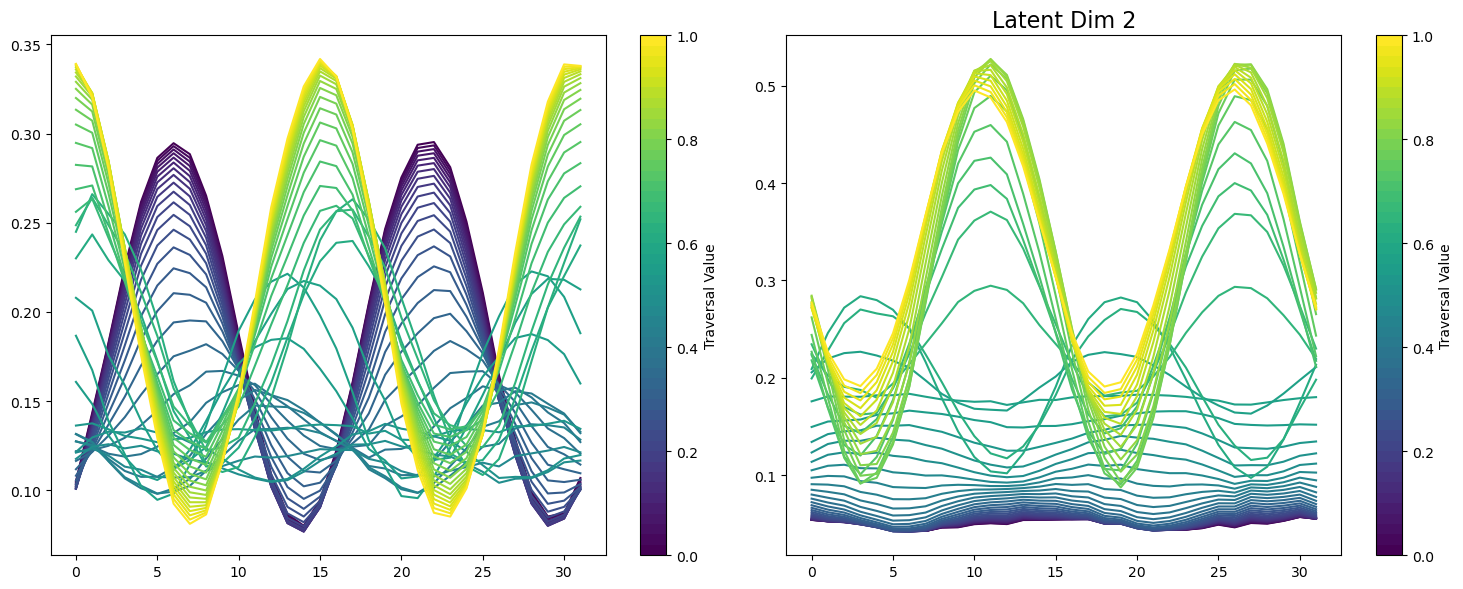

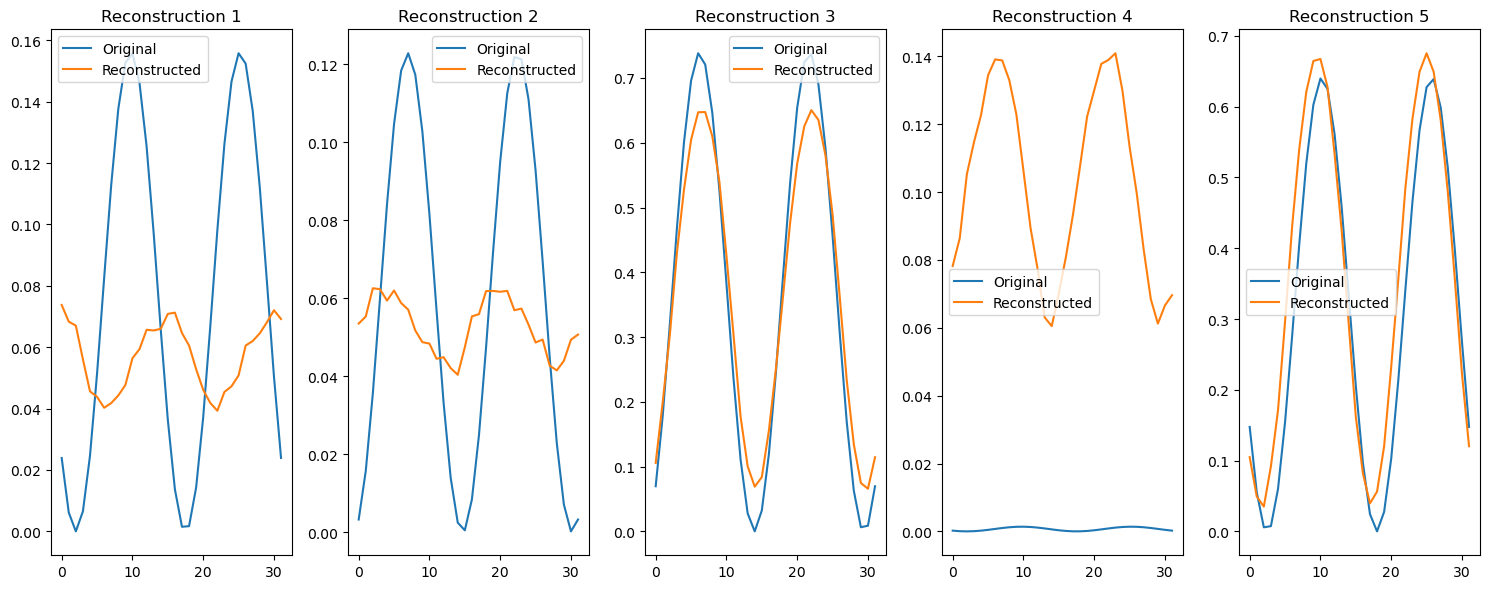

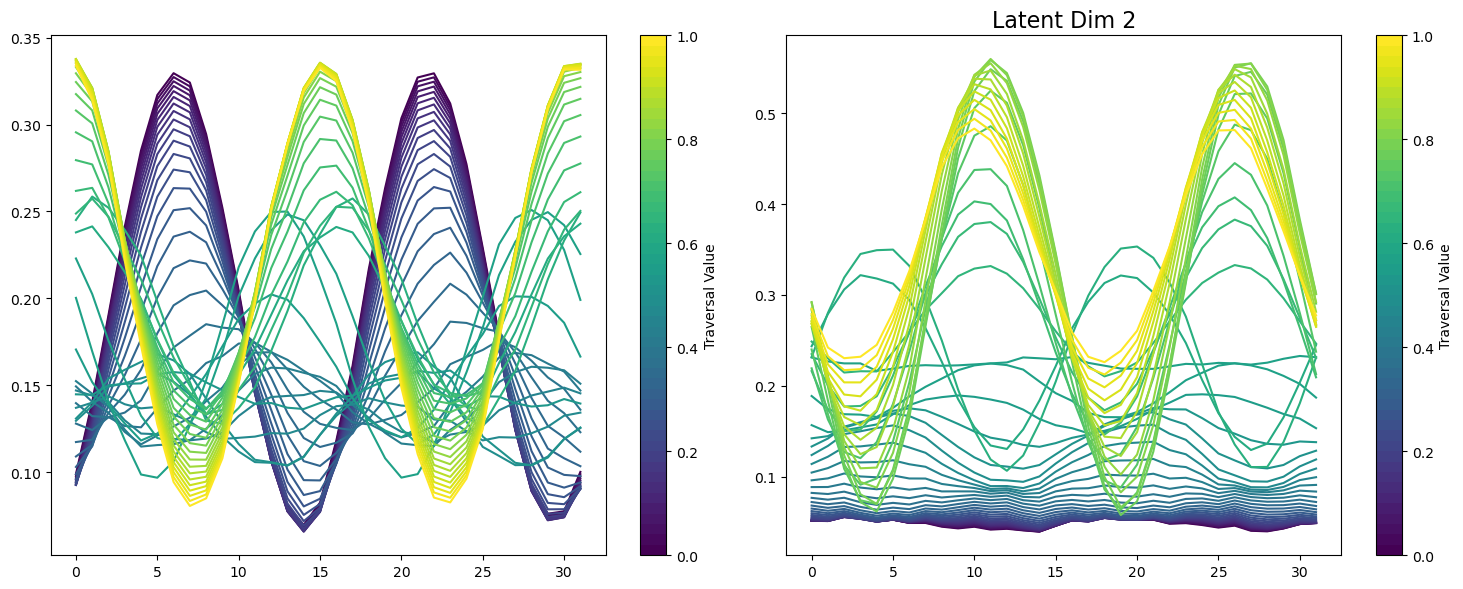

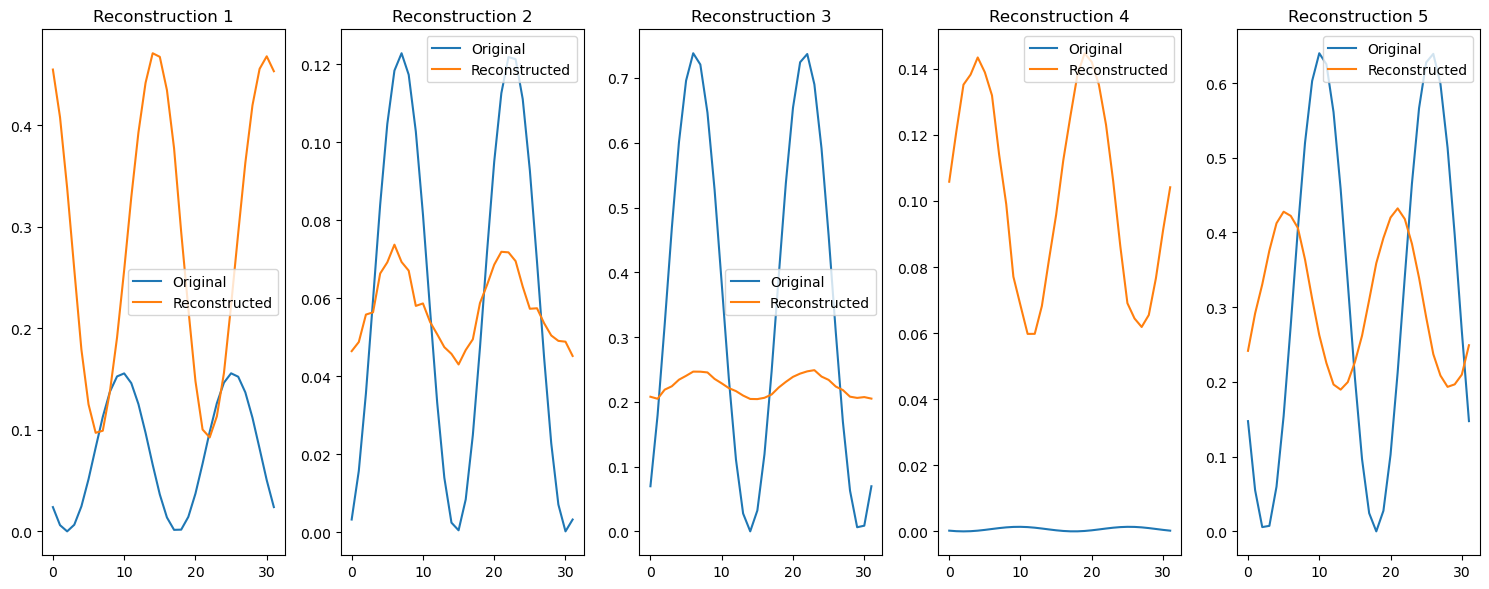

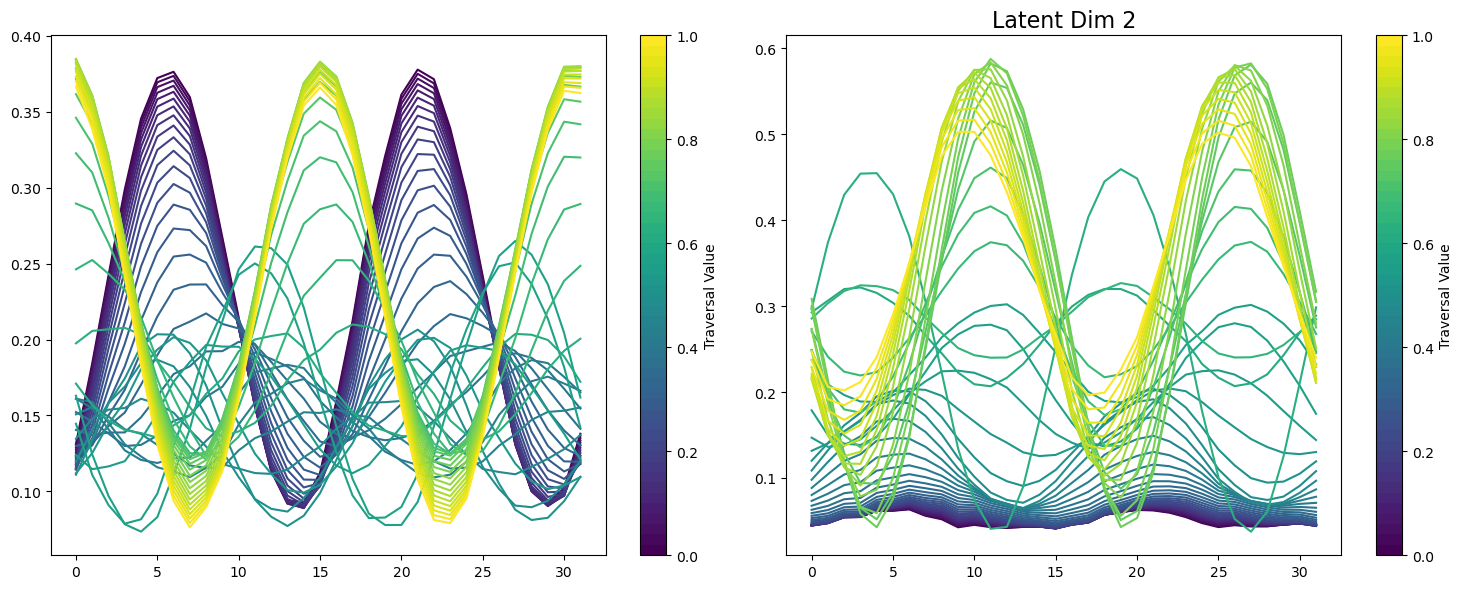

In [13]:
dir_ = 'disentangled_3'
epochs = [400, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200]
for epoch in epochs:
    features = [64, 32, 16, 8 ,4]
    in_dim = 32
    out_dim = 2
    encoder = Encoder(in_dim, features, out_dim)
    decoder = Decoder(out_dim, list(reversed(features)), in_dim)
    model = VAE(encoder, decoder)
    model.load_state_dict(torch.load('saved_models/' + dir_ + '/model_' + str(epoch) + '.pth'))
    with open('saved_models/' + dir_ + '/dataset.pkl', 'rb') as f:
        dataset = pkl.load(f)
    plot_reconstructions(model, dataset, epoch, num_samples=5)
    plot_latent_traversal(model, epoch, num_samples=50)